In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict, Counter
import re
import seaborn as sns

In [2]:
BB = pd.read_csv("../data/Hot Stuff.csv")
BB["WeekID"] = pd.to_datetime(BB["WeekID"])
Genius = pickle.loads(open("../data/pickle/GeniusGithub_reformat.pickle", "rb").read())

In [3]:
[np.min([i for i in BB["WeekID"]]), np.max([i for i in BB["WeekID"]])]

[Timestamp('1958-08-02 00:00:00'), Timestamp('2018-12-29 00:00:00')]

### Making the BB dataFrame. Adding the Month ID as Float (Year + (Month-1)/12)

In [4]:
BB_Song = BB.groupby(["Performer", "Song"]).agg({"WeekID": np.min}).reset_index()
BB_Song["WeekID"] = pd.to_datetime(BB_Song["WeekID"])
BB_Song["MonthID"] = [i.year + (i.month - 1)/12 for i in BB_Song["WeekID"]]

In [5]:
BB_Song.head()

,Performer,Song,WeekID,MonthID
0,"""Groove"" Holmes",Misty,1966-06-25,1966.416667
1,"""Groove"" Holmes",What Now My Love,1966-10-01,1966.750000
2,"""Little"" Jimmy Dickens",May The Bird Of Paradise Fly Up Your Nose,1965-10-16,1965.750000
3,"""Pookie"" Hudson",I Know I Know,1963-05-25,1963.333333
4,"""Weird Al"" Yankovic",Amish Paradise,1996-03-30,1996.166667


In [6]:
BB[(BB["Performer"] == "Maroon 5") & (BB["Song"] == "Stutter")]

,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart
22039,http://www.billboard.com/charts/hot-100/2010-1...,2010-10-09,84,Stutter,Maroon 5,StutterMaroon 5,1,NaN,84,1


In [7]:
BB_Song[BB_Song["Performer"] == "Maroon 5"]

,Performer,Song,WeekID,MonthID
15742,Maroon 5,Animals,2014-09-06,2014.666667
15743,Maroon 5,Daylight,2012-12-22,2012.916667
15744,Maroon 5,Give A Little More,2010-09-04,2010.666667
15745,Maroon 5,Harder To Breathe,2003-08-23,2003.583333
15746,Maroon 5,It Was Always You,2014-08-16,2014.583333
15747,Maroon 5,Love Somebody,2013-06-08,2013.416667
15748,Maroon 5,Makes Me Wonder,2007-04-21,2007.250000
15749,Maroon 5,Maps,2014-07-05,2014.500000
15750,Maroon 5,Misery,2010-07-10,2010.500000
15751,Maroon 5,Never Gonna Leave This Bed,2011-05-14,2011.333333


### Making the Reformatted Genius into a pd Dataframe

In [8]:
list_of_words = lambda ly : " ".join(re.split(r"\[[\s\S]*?\]|[^\w'\\-]|\s",ly.lower())).split()
Genius_Song = pd.DataFrame([(a, s, Genius[a][s]["lyrics"], list_of_words(Genius[a][s]["lyrics"])) for a in Genius.keys() for s in Genius[a].keys()])
Genius_Song.columns = ["Performer", "Song", "Lyrics", "List"]
Genius_Song["Bag"] = [Counter(i) for i in Genius_Song["List"]]

In [9]:
Genius_Song.head()

,Performer,Song,Lyrics,List,Bag
0,"10,000 Maniacs",Few And Far Between,"Times are far between, and few I bet, when we ...","[times, are, far, between, and, few, i, bet, w...","{'times': 1, 'are': 3, 'far': 1, 'between': 1,..."
1,"10,000 Maniacs",Trouble Me,[Chorus:]\nTrouble me\nDisturb me with all you...,"[trouble, me, disturb, me, with, all, your, ca...","{'trouble': 4, 'me': 17, 'disturb': 1, 'with':..."
2,"10,000 Maniacs",More Than This,I could feel at the time\nThere was no way of ...,"[i, could, feel, at, the, time, there, was, no...","{'i': 1, 'could': 1, 'feel': 1, 'at': 1, 'the'..."
3,"10,000 Maniacs",Candy Everybody Wants,"[Intro]\nHey, hey, give 'em what they want\n\n...","[hey, hey, give, 'em, what, they, want, if, lu...","{'hey': 8, 'give': 7, ''em': 7, 'what': 7, 'th..."
4,"10,000 Maniacs",Because The Night,"[Verse 1]\nTake me now, baby, here as I am\nHo...","[take, me, now, baby, here, as, i, am, hold, m...","{'take': 6, 'me': 5, 'now': 12, 'baby': 2, 'he..."


### Merge the two DF

In [10]:
Genius_Song = pd.merge(Genius_Song, BB_Song, left_on = ["Performer", "Song"], right_on = ["Performer", "Song"], how="left").reset_index(drop=True)
Genius_Song.shape

(20191, 7)

In [11]:
Genius_Song.head()

,Performer,Song,Lyrics,List,Bag,WeekID,MonthID
0,"10,000 Maniacs",Few And Far Between,"Times are far between, and few I bet, when we ...","[times, are, far, between, and, few, i, bet, w...","{'times': 1, 'are': 3, 'far': 1, 'between': 1,...",1993-08-21,1993.583333
1,"10,000 Maniacs",Trouble Me,[Chorus:]\nTrouble me\nDisturb me with all you...,"[trouble, me, disturb, me, with, all, your, ca...","{'trouble': 4, 'me': 17, 'disturb': 1, 'with':...",1989-06-17,1989.416667
2,"10,000 Maniacs",More Than This,I could feel at the time\nThere was no way of ...,"[i, could, feel, at, the, time, there, was, no...","{'i': 1, 'could': 1, 'feel': 1, 'at': 1, 'the'...",1997-07-12,1997.500000
3,"10,000 Maniacs",Candy Everybody Wants,"[Intro]\nHey, hey, give 'em what they want\n\n...","[hey, hey, give, 'em, what, they, want, if, lu...","{'hey': 8, 'give': 7, ''em': 7, 'what': 7, 'th...",1993-03-06,1993.166667
4,"10,000 Maniacs",Because The Night,"[Verse 1]\nTake me now, baby, here as I am\nHo...","[take, me, now, baby, here, as, i, am, hold, m...","{'take': 6, 'me': 5, 'now': 12, 'baby': 2, 'he...",1993-11-06,1993.833333


In [18]:
pickle.dump(Genius_Song, open("../data/pickle/Genius_lyrics.pickle", "wb"))

#### Group by Month

In [12]:
month_count_df = Genius_Song.groupby("MonthID").count()["Song"]

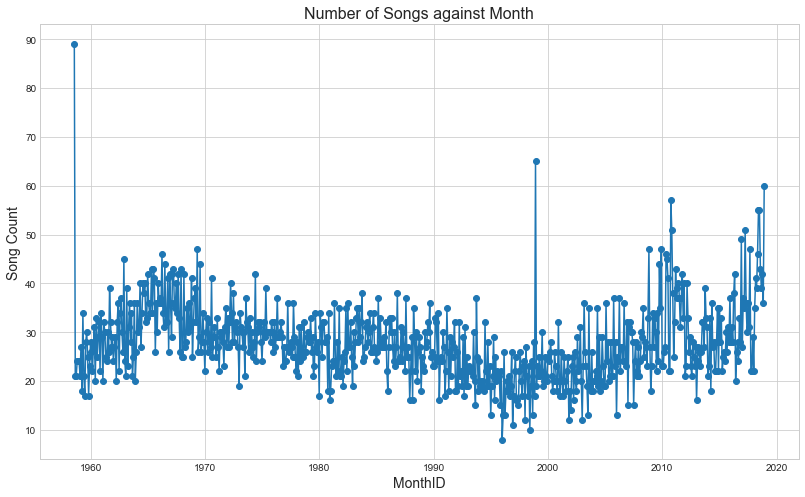

In [13]:
def plot_Count(df, timeGranu):
    plt.figure(figsize = (13.6, 8))
    sns.set_style("whitegrid")
    plt.plot(list(df.index), list(df), "-o")
    plt.xlabel("{}ID".format(timeGranu), fontsize=14)
    plt.ylabel("Song Count", fontsize=14)
    plt.title("Number of Songs against {}".format(timeGranu), fontsize=16)
    plt.show()
plot_Count(month_count_df, "Month")

#### Group by Quarter

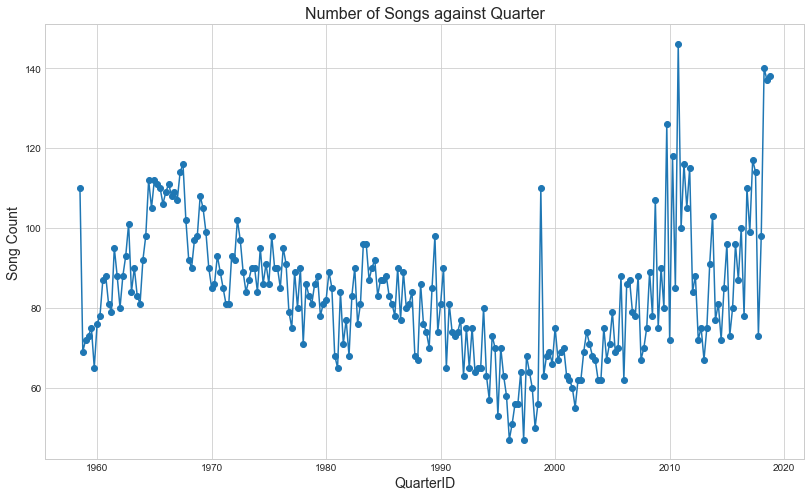

In [14]:
quarter_count_df = Genius_Song.groupby(lambda x: Genius_Song.loc[x, "WeekID"].year + (Genius_Song.loc[x, "WeekID"].quarter - 1) * 0.25).count()["Song"]
plot_Count(quarter_count_df, "Quarter")

#### Group by Half-of-Year

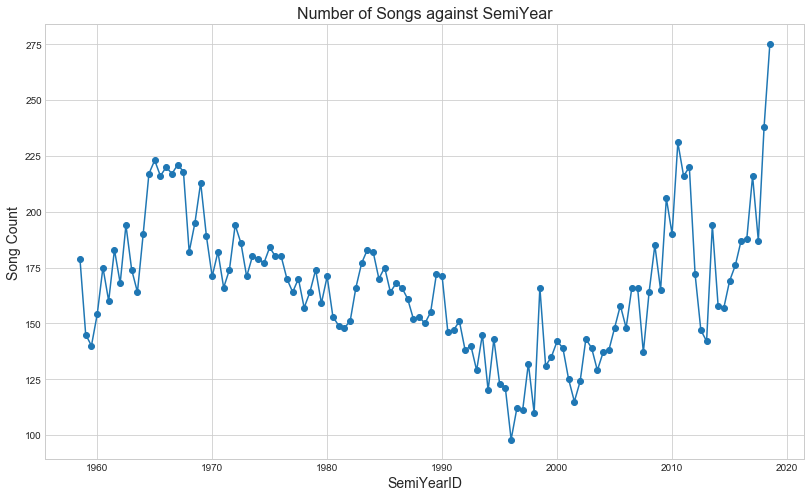

In [15]:
semiYear_count_df = Genius_Song.groupby(lambda x: Genius_Song.loc[x, "WeekID"].year + (Genius_Song.loc[x, "WeekID"].quarter - 1)//2 * 0.5).count()["Song"]
plot_Count(semiYear_count_df, "SemiYear")

#### Group by Year

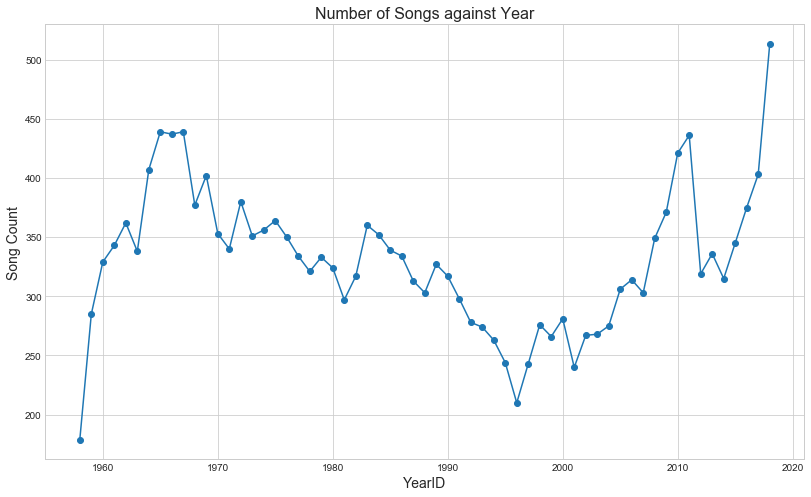

In [16]:
year_count_df = Genius_Song.groupby(lambda x: Genius_Song.loc[x, "WeekID"].year).count()["Song"]
plot_Count(year_count_df, "Year")

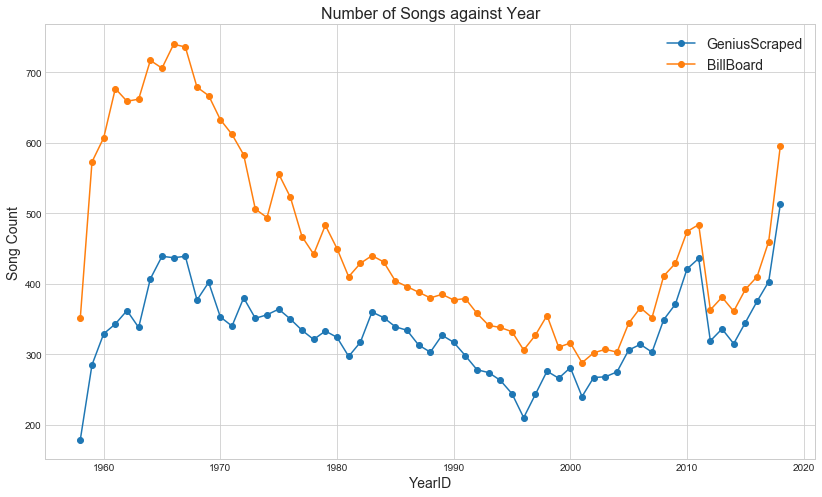

In [17]:
BB_year_count_df = BB_Song.groupby(lambda x: BB_Song.loc[x, "WeekID"].year).count()["Song"]
plt.figure(figsize=(13.8, 8))
sns.set_style("whitegrid")
plt.plot(list(year_count_df.index), list(year_count_df), "-o", label="GeniusScraped")
plt.plot(list(BB_year_count_df.index), list(BB_year_count_df), "-o", label="BillBoard")
plt.xlabel("{}ID".format("Year"), fontsize=14)
plt.ylabel("Song Count", fontsize=14)
plt.legend(fontsize=14)
plt.title("Number of Songs against {}".format("Year"), fontsize=16)
plt.show()

#### Construct Bag_of_Words

In [19]:
word_of_bags = pd.DataFrame()

In [20]:
all_words = [j for i in Genius_Song["List"] for j in i]

In [21]:
word_count = Counter(all_words)
word_of_bags["Words"], word_of_bags["Count"] = zip(*[(i, word_count[i]) for i in word_count.keys()])
songCount = Counter([j for i in Genius_Song["Bag"] for j in i.keys()])
for i in range(word_of_bags.shape[0]):
    word_of_bags.loc[i, "SongCount"] = songCount[word_of_bags.loc[i, "Words"]]

In [22]:
word_of_bags.shape

(60620, 3)

In [23]:
word_time = defaultdict(set)
for i in range(Genius_Song.shape[0]):
    song_month_id = Genius_Song.loc[i, "MonthID"]
    for word in Genius_Song.loc[i, "List"]:
        word_time[word].add(song_month_id)

In [24]:
word_time_span = dict()
for word in word_time.keys():
    word_time_span[word] = (np.max(list(word_time[word])) - np.min(list(np.min(word_time[word])))) * 12 // 6

In [25]:
Counter(list(word_time_span.values())).most_common(20)

[(-0.0, 32848),
 (120.0, 1583),
 (119.0, 699),
 (118.0, 520),
 (117.0, 454),
 (1.0, 436),
 (116.0, 424),
 (115.0, 342),
 (114.0, 334),
 (113.0, 328),
 (112.0, 315),
 (4.0, 302),
 (3.0, 301),
 (105.0, 300),
 (2.0, 296),
 (103.0, 292),
 (110.0, 282),
 (101.0, 280),
 (104.0, 276),
 (109.0, 267)]

In [26]:
for i in range(word_of_bags.shape[0]):
    word_of_bags.loc[i, "SemiAnnualSpan"] = word_time_span[word_of_bags.loc[i, "Words"]]

In [27]:
word_of_bags.head()

,Words,Count,SongCount,SemiAnnualSpan
0,times,2487,1341.0,120.0
1,are,14319,5777.0,120.0
2,far,2202,1322.0,120.0
3,between,1042,668.0,119.0
4,and,127508,18459.0,120.0


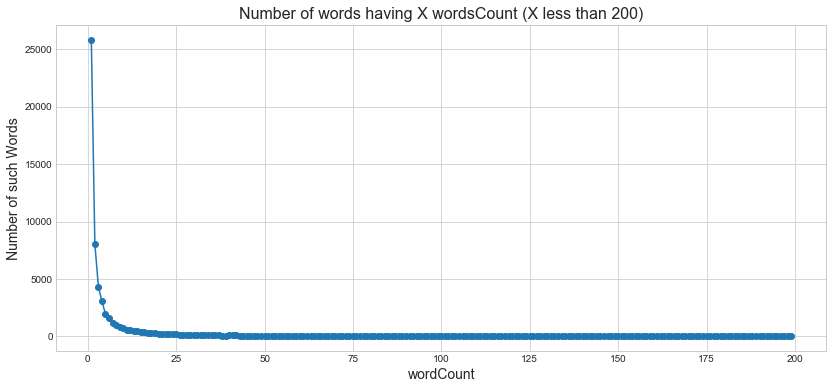

In [28]:
plt.figure(figsize=(13.8, 6))
plt.plot(list(word_of_bags[word_of_bags["Count"] < 200].groupby("Count").count().index), list(word_of_bags[word_of_bags["Count"] < 200].groupby("Count").count()["Words"]), "-o")
plt.xlabel("wordCount", fontsize=14)
plt.ylabel("Number of such Words", fontsize=14)
plt.title("Number of words having X wordsCount (X less than 200)", fontsize=16)
plt.show()

In [29]:
word_of_bags.head()

,Words,Count,SongCount,SemiAnnualSpan
0,times,2487,1341.0,120.0
1,are,14319,5777.0,120.0
2,far,2202,1322.0,120.0
3,between,1042,668.0,119.0
4,and,127508,18459.0,120.0


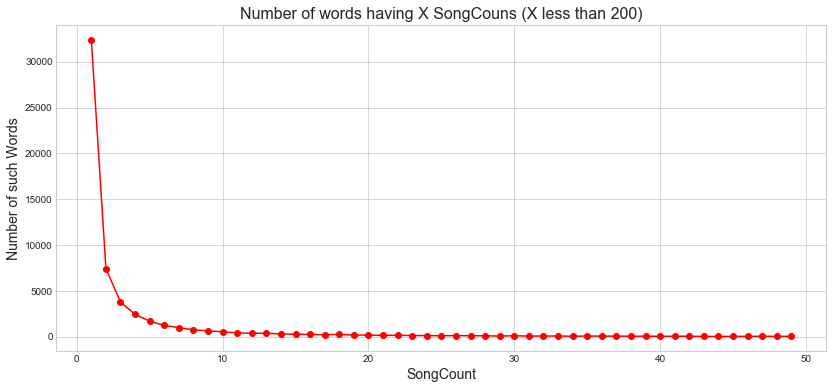

In [30]:
plt.figure(figsize=(13.8, 6))
plt.plot(list(word_of_bags[word_of_bags["SongCount"] < 50].groupby("SongCount").count().index), list(word_of_bags[word_of_bags["SongCount"] < 50].groupby("SongCount").count()["Words"]), "-ro")
plt.xlabel("SongCount", fontsize=14)
plt.ylabel("Number of such Words", fontsize=14)
plt.title("Number of words having X SongCouns (X less than 200)", fontsize=16)
plt.show()

In [31]:
word_of_bags.to_csv("bag_of_words.csv")